In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install pandas

In [ ]:
data = pd.read_csv("/content/utf-8-book.csv")

In [ ]:
data.shape

(10000, 4)

In [ ]:
data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [ ]:
new = data.drop(columns="Unnamed: 0")

In [ ]:
new.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [ ]:
new.shape

(10000, 3)

In [ ]:
new[new['Book.Title'] == 'Classical Mythology']

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5


In [ ]:
new[new['Book.Title'] == 'Decision in Normandy']

,User.ID,Book.Title,Book.Rating
2,276729,Decision in Normandy,6


In [ ]:
new[new['Book.Title'] == 'Fahrenheit 451']

,User.ID,Book.Title,Book.Rating
179,276875,Fahrenheit 451,2
2230,278633,Fahrenheit 451,7
5589,2442,Fahrenheit 451,10
7989,4049,Fahrenheit 451,8
8191,4207,Fahrenheit 451,8


In [ ]:
new[new['Book.Title'] == 'Charlie and the Chocolate Factory']

,User.ID,Book.Title,Book.Rating
6373,3326,Charlie and the Chocolate Factory,8
6968,3719,Charlie and the Chocolate Factory,7
9103,161577,Charlie and the Chocolate Factory,6
9129,161619,Charlie and the Chocolate Factory,5


In [ ]:
new['Book.Title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

In [ ]:
new['Book.Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

In [ ]:
new[new['Book.Rating'] == 10]

,User.ID,Book.Title,Book.Rating
6,276745,What If?: The World's Foremost Military Histor...,10
16,276760,More Cunning Than Man: A Social History of Rat...,10
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10
34,276788,Sturmzeit. Roman.,10
...,...,...,...
9958,162052,HOUSE OF MIRTH,10
9967,162052,The Man Who Ate the 747,10
9968,162052,Women of Mystery,10
9969,162054,The Maggody Militia: An Arly Hanks Mystery (Ar...,10


In [ ]:
new[new['Book.Rating'] == 10].value_counts()

User.ID  Book.Title                                                          Book.Rating
12       Apocalypse Wow                                                      10             1
161252   The Wise And Foolish Virgins                                        10             1
161385   One Hundred and Eighty-Seven Ways to Amuse a Bored Cat              10             1
         Into the Tangle of Friendship : A Memoir of the Things That Matter  10             1
161373   Army Brat: A Memoir                                                 10             1
                                                                                           ..
2134     To Tame a Highland Warrior                                          10             1
         The Wife Test                                                       10             1
         Crystal Flame                                                       10             1
2110     Zen Meditations on Being a Mother (Zen Meditations)     

In [ ]:
new['Book.Rating'].sort_values()

4337     1
4540     1
640      1
6144     1
4523     1
        ..
2636    10
6087    10
8414    10
8437    10
3225    10
Name: Book.Rating, Length: 10000, dtype: int64

In [ ]:
new.sort_values(by=['Book.Rating'], ascending=False)

,User.ID,Book.Title,Book.Rating
7785,3943,The Bunyans,10
2318,278750,Sit &amp; Solve - Lateral Thinking Puzzles,10
2325,278772,Feeling Good : The New Mood Therapy,10
5634,2453,O Little Town Of Glory (Men Of Glory) (Harleq...,10
2340,278807,Women Can't Hear What Men Don't Say: Destroyin...,10
...,...,...,...
1717,278202,Catechism of the Catholic Church,1
9598,161968,Pretty in Pink,1
640,277363,Children of the Night,1
8879,161348,"Eddie Would Go : The Story of Eddie Aikau, Haw...",1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

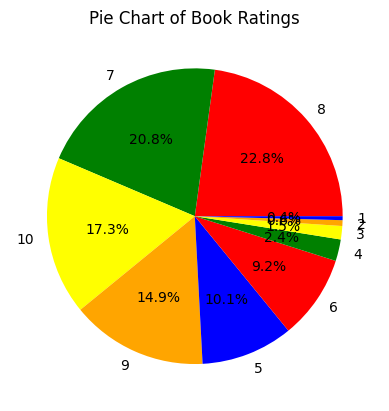

In [ ]:
import matplotlib.pyplot as plt

rating_counts = new['Book.Rating'].value_counts()
labels = rating_counts.index.to_list()
colors = ['red', 'green', 'yellow', 'orange', 'blue']

plt.pie(rating_counts, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Pie Chart of Book Ratings")
plt.show()


<Axes: ylabel='Frequency'>

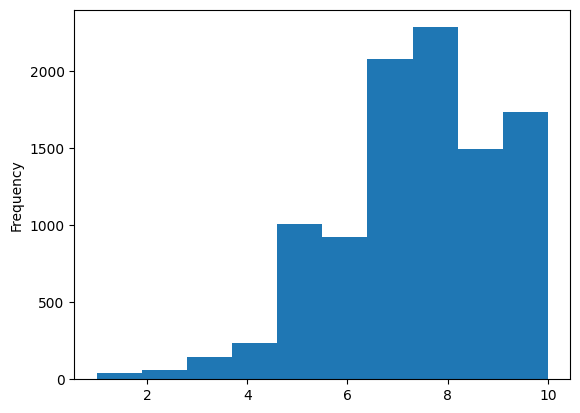

In [ ]:
new['Book.Rating'].plot.hist(x="Book.Title", y="Book.Rating")

In [ ]:
# prompt: tree map graph on books rating

import plotly.express as px

# Create the treemap graph
fig = px.treemap(new, path=['Book.Title'], values='Book.Rating',
                  color='Book.Rating', color_continuous_scale='viridis')

# Update the layout
fig.update_layout(title='Treemap of Book Ratings')

# Show the graph
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create the data
df = new.groupby('Book.Title')['Book.Rating'].sum().reset_index()
df['previous_rating'] = df['Book.Rating'].shift(1)
df['delta'] = df['Book.Rating'] - df['previous_rating']

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    name = 'Rating',
    orientation = 'v',
    measure = ['relative', 'relative', 'total', 'relative', 'relative', 'total'],
    x = df['Book.Title'],
    textposition = "outside",
    text = df['Book.Rating'].astype(str),
    y = df['delta'],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

# Update the layout
fig.update_layout(
    title = "Waterfall Chart of Book Ratings",
    xaxis_title = "Book",
    yaxis_title = "Rating",
)

# Show the chart
fig.show()


In [ ]:
new.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
new.columns = ['User.ID', 'Book.Title', 'Book.Rating']

In [ ]:
new = new.drop_duplicates()

In [ ]:
duplicate_users = new['User.ID'].duplicated().sum()
print(f"Number of duplicate users: {duplicate_users}")

Number of duplicate users: 7816


In [ ]:
new = new.drop_duplicates()

In [ ]:
new['User.ID'].drop_duplicates()

0       276726
1       276729
3       276736
4       276737
5       276744
         ...  
9987    162107
9988    162109
9989    162113
9990    162121
9999    162129
Name: User.ID, Length: 2182, dtype: int64

In [ ]:
new.shape

(9998, 3)

In [ ]:
new.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [ ]:
new.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [ ]:
new['User.ID'].duplicated().sum()

7816

In [ ]:
new = new.drop_duplicates(subset='User.ID')

In [ ]:
trans_data = new.pivot(index='User.ID',
                       columns='Book.Title',
                       values='Book.Rating')

In [ ]:
trans_data.head()

Book.Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
trans_data.shape

(2182, 2163)

In [ ]:
trans_data

Book.Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_nan = trans_data.fillna(0, inplace=True)

In [ ]:
trans_data

Book.Title,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,13 99 Euros,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,253,...,Your Oasis on Flame Lake,"Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cosine based similarity

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
use_cos = 1 - pairwise_distances(trans_data.values,metric='cosine')

In [ ]:
use_cos

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
np.fill_diagonal(use_cos, 0)

In [ ]:
use_cos_df = pd.DataFrame(use_cos)

In [ ]:
use_cos_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new['User.ID'] = 'user'

In [ ]:
new.head()

,User.ID,Book.Title,Book.Rating
0,user,Classical Mythology,5
1,user,Clara Callan,3
2,user,Decision in Normandy,6
3,user,Flu: The Story of the Great Influenza Pandemic...,8
4,user,The Mummies of Urumchi,6


In [ ]:
new.rename(columns={'User.ID': 'user'}, inplace=True)
new.head()


,user,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [ ]:
use_cos_df.columns = new.user.unique()
use_cos_df.index = new.user.unique()

In [ ]:
use_cos_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
use_cos_df.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    276726
162121    276726
162129    276726
Length: 2182, dtype: int64

In [ ]:
use_cos_df.idxmax(axis=1)[0:10]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    276726
276751    276726
276754    276726
dtype: int64

In [ ]:
use_cos_df.iloc[:1]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
unique_values = use_cos_df.iloc[0].unique()
print(unique_values)


[0.]


In [ ]:
unique_values = use_cos_df.iloc[1].unique()
print(unique_values)

[0.]


In [ ]:
unique_values = use_cos_df.iloc[2].unique()
print(unique_values)

[0.]


In [ ]:
use_cos_df.iloc[0:20, 0:20]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
use_cos_df.iloc[100:200, 100:200]

,277053,277056,277058,277065,277072,277074,277079,277085,277087,277090,...,277379,277380,277384,277389,277392,277397,277399,277400,277402,277424
277053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
